# Binary Preprocessing

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

## Importing dataset

In [26]:
df = pd.read_csv('dataset.csv')

In [27]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,Max,Min,Day,y
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,1,5,0.166667,NaN
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,1,5,0.333333,2.0
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,1,5,0.500000,3.0
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,1,5,0.666667,2.0
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,1,5,0.000000,2.0


## Creating binary input

In [28]:
def binarization(group):
    if not "Binary" in group.columns:
        group.loc[:,"Binary"] = group.loc[:,"Close"] - group.loc[:,"Open"]
        return group

In [29]:
df = df.groupby("Stock").apply(binarization)

In [30]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,Max,Min,Day,y,Binary
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,1,5,0.166667,NaN,0.003830
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,1,5,0.333333,2.0,0.001793
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,1,5,0.500000,3.0,0.035037
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,1,5,0.666667,2.0,0.005513
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,1,5,0.000000,2.0,-0.002969


In [31]:
df.loc[:,"Binary"] = df.loc[:,"Binary"].apply(lambda binary : 0 if binary == 0 else (1 if binary > 0 else 2))
df.loc[:,'Binary'] = df.Binary.apply(lambda num : format(num, '02b'))

In [32]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,Max,Min,Day,y,Binary
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,1,5,0.166667,NaN,01
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,1,5,0.333333,2.0,01
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,1,5,0.500000,3.0,01
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,1,5,0.666667,2.0,01
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,1,5,0.000000,2.0,10


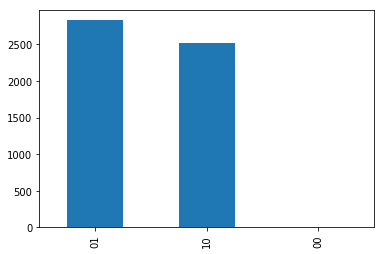

In [35]:
df.Binary.value_counts().plot(kind='bar')

## Adding day to the encoding
* 000: Monday 0
* 001: Tuesday
* 010: Wednesday
* 011: Thursday
* 100: Friday

In [17]:
df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
df.loc[:,'Day_bin'] = df.Date.dt.dayofweek.apply(lambda day : format(day, '03b'))

In [21]:
df.Day_bin.head()

0    001
1    010
2    011
3    100
4    000
Name: Day_bin, dtype: object